<a href="https://colab.research.google.com/github/MaxBusha/CS-5324/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 5328 Lab Assignment 2: Exploring Image Data


Team Members:
- Max Busha
- Briana Camillus
- Evan Hennes

# 1. Business Understanding
The dataset chosen contains 15,000 images of vegetables that are each categorized into different subfolders based on what type of vegetable it is. This data was originally collected from Vegetable Farm and Market by the author. Because many steps of vegetable production and delivery is done manually, this data was collected to develop a model that could detect and classify vegetables.

The prediction task for this dataset is to identify the important features of an image. This could be useful to companies that sell vegetables and want to know what the key features are to high quality vegetables. It could also be useful to those who work in agriculture or farming because the methods used can help identify which features are associated with diseases or harm from pesticides. Additionally, it would help identify the type of vegetable based off of those important features determined. This data is important because identifying vegetables can be done automatically instead of manually by people. It is more efficient and saves time and energy.

In order for our prediction algorithm performance to be considered useful, it should accurately remove unnecessary dimensions of the dataset so that it will be easier to analyze. Those who work in agriculture, farming, or companies that sell vegetables will be able to see trends and make conclusion more accurately if dimensionality reduction is performed and removes the unnecessary dimensions that would make it challenging to visualize and analyze images in a computationally efficient way. With better data methodologies, companies find ways to increase their sales and produce/distribute vegetables of higher quality.




# 2. Data Preparation

Below are some installs that are used to make sure we can get the kaggle data, we also included some that should be there for redundancy

In [ ]:
!pip install opendatasets
!pip install pandas
!pip install numpy
!pip install pillow

**This** code cell is used to import the kaggle dataset that we use for the project


In [ ]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: maxbusha07
Your Kaggle Key: ··········


100%|██████████| 534M/534M [00:09<00:00, 57.9MB/s]


This code block is used to import the rest of the libraries that will be used in the project. It also includes the steps used to iterate over the subfolder directory to organize the pictures that we will use into a list, both linearizing it and making it greyscale in the process. We also create a related list of labels to use as the target data in the lab, these lists are titled 'image_data' and 'labels' respectively. This is done to make the image data-dense and more workable for the computationally expensive steps later in the process.

The images are grabbed using the PIL import and made greyscale before they are linearized. They are made into greyscale images to limit the size of the data as the previous 3d arrays the images were comprised of due to their RGB values was computationally expensive.

We are grabbing the labels in 'specified_labels' as when we initially used all of the labels, 15 of them, the code cells for the project were very slow and the accuracy of the program was only around 50%. By doing this the code runs much faster and the accuracy is now around 90% for most methods. We understand that by limiting the target datum we limit the business applications of the code but without this step the code runtimes would be much less manageable and the accuracy of the image recognition would limit the application as well.


In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
from PIL import Image

# Path to the directory containing subfolders
data_dir = "vegetable-image-dataset/Vegetable Images/train"

# Initialize lists to store image data and labels
image_data = []
labels = []
specified_labels = ["Pumpkin", "Radish", "Bean", "Bottle_Gourd"]  # Specify the labels you want to access


# Iterate through each subfolder in the directory
for label in os.listdir(data_dir):
    if label not in specified_labels:
        continue  # Skip labels not in specified_labels
    label_dir = os.path.join(data_dir, label)
    if os.path.isdir(label_dir):
        # Iterate through each image file in the subfolder
        for filename in os.listdir(label_dir):
            image_path = os.path.join(label_dir, filename)
            # Read the image
            image = Image.open(image_path)
            grayscale_image = image.convert("L")

            img1array = np.asarray(grayscale_image)
            img1flat = img1array.flatten()

            if img1flat.shape != (50176,):
              continue

            # Append the image data and label to lists
            image_data.append(img1flat)
            labels.append(label)


The below code blocks are used to check that the labels for the data were stored correctly and that the shape of the image data is to be expected. They show that all the unique labels are stored correctly and that the image shape is (50175, 0) as the images were initially (224, 224, 3) and we made them greyscale and linearized them (224*224=50175).

In [ ]:
unique_valuestest = set(labels)
print(unique_valuestest)

{'Radish', 'Bean', 'Bottle_Gourd', 'Pumpkin'}


In [ ]:
print(labels)
print(len(labels))

['Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin'

In [ ]:
print(img1flat.shape)
print(np.shape(image_data[0])[0])
print(np.shape(image_data))

(50176,)
50176
(4000, 50176)


#Data Visualization

The below code is used to visualize the data that we will be exploring in this lab. It shows some images of each of the specified labels from the previous coding step in which we made the lists of image data and label.

For each of the specified labels we will be using 1000 images. Through exploration of the data on the kaggle website and through visualizations throughout the lab we have avoided some low quality labels such as the 'tomato' label which commonly had stretched images that caused problems across image recognition.

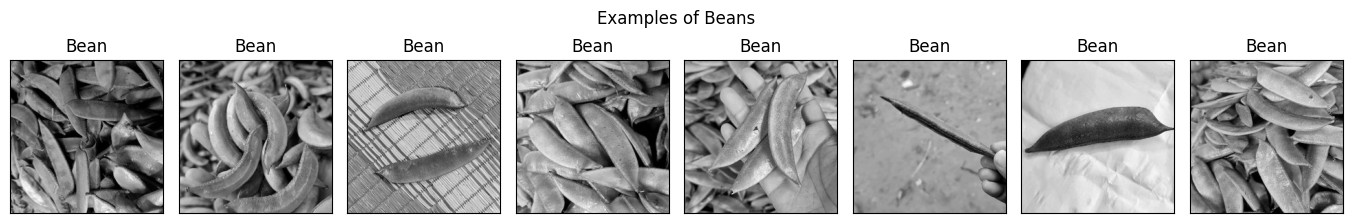

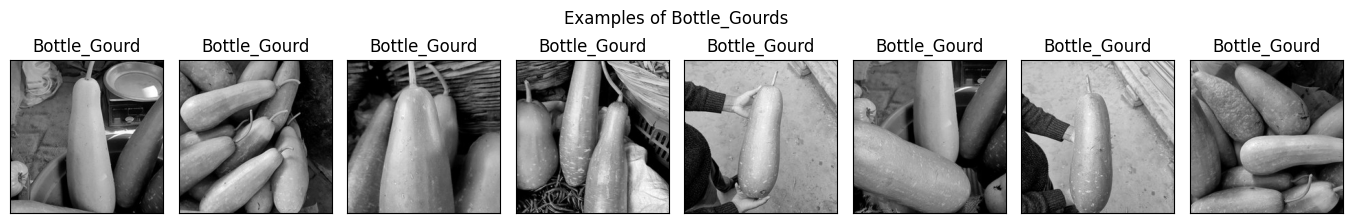

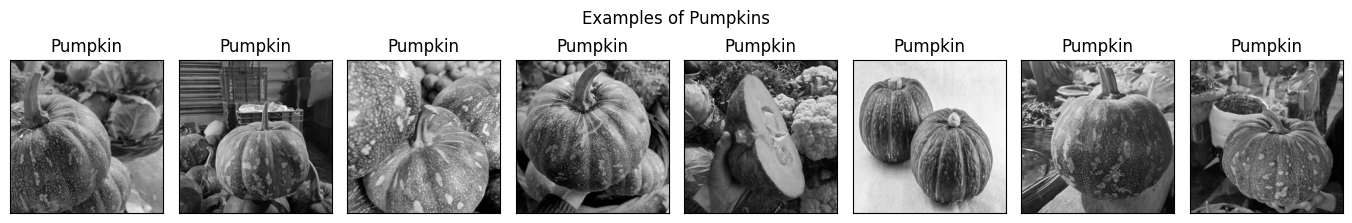

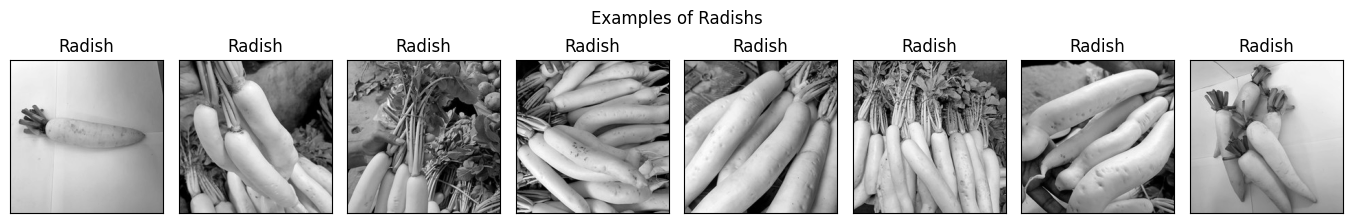

In [ ]:
import matplotlib.pyplot as plt

def plot_gallery(images, titles, h, w, n_row=3, n_col=6, title=''):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, wspace = .1, hspace=0)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        if (titles) :
            plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
    if (titles): y=1
    else: y=0.93
    plt.suptitle(title, y=y)

imgRange = 8
h, w = 224, 224

unique_labels = np.unique(labels)

# Plot examples for each unique label
for label in unique_labels:
    # Filter image_data and labels for the current label
    label_indices = [i for i, l in enumerate(labels) if l == label]
    label_images = [image_data[i] for i in label_indices][:imgRange]
    label_titles = [f"{label}" for i in label_indices][:imgRange]

    # Plot gallery for the current label
    plot_gallery(label_images, label_titles, h, w, 1, imgRange, f'Examples of {label}s')

plt.show()


#3. Data Reduction

The following code comprises our PCA dimensionality reduction of the dataset. We extract the most valuable eigen"vegetables" and visualize them along with the variance explained by the data values and discuss our thoughts/reasoning after.

#PCA Dimensionality Reduction

Extracting the top 500 eigenvegetables from 4000 vegetables
CPU times: user 2min 33s, sys: 11 s, total: 2min 44s
Wall time: 1min 40s


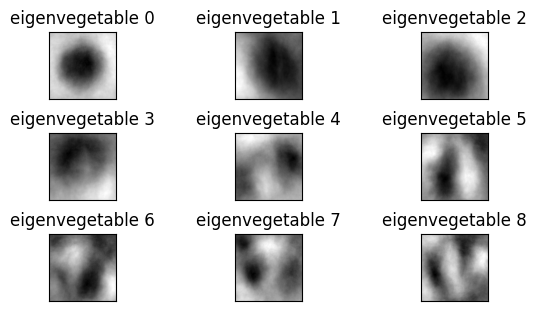

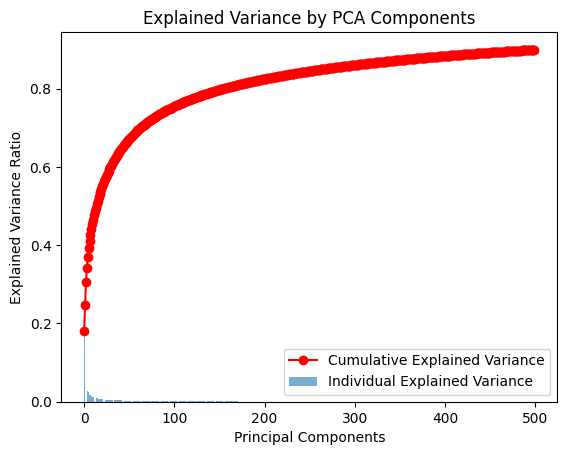

In [ ]:
from sklearn.decomposition import PCA

# Function to plot explained variance by PCA components
def plot_explained_variance(pca):
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    plt.bar(range(len(explained_var)), explained_var, alpha=0.6, label='Individual Explained Variance')
    plt.plot(range(len(cum_var_exp)), cum_var_exp, label='Cumulative Explained Variance', color='red', marker='o')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance by PCA Components')
    plt.legend(loc='best')
    plt.show()

n_components = 500

print(f'Extracting the top {n_components} eigenvegetables from {len(image_data)} vegetables')

# Perform PCA
pca = PCA(n_components=n_components)
%time pca.fit(image_data)

# Reshape eigenvegetables
eigenvegetables = pca.components_.reshape((n_components, 224, 224))

eigenvegetable_titles = ["eigenvegetable %d" % i for i in range(eigenvegetables.shape[0])]

# Plot first 9 eigenvegetables
for i in range(9):
    plt.subplot(int(3) + 1, 3, i + 1)
    plt.imshow(eigenvegetables[i], cmap='gray')
    plt.title(eigenvegetable_titles[i])
    plt.xticks(())
    plt.yticks(())
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

# Plot explained variance
plot_explained_variance(pca)


As seen in the above visualization we have extracted the most valuable eigen"vegetables" from the data. We extracted 500 of these for the following reasons. Most of the variance is explained in the first 100 principal components in the set but we were not confident in collecting this few as the explained variance wouldn't be high enough to reasonably apply the program. Beyond choosing 500 for the sake of it being a nice round number it approaches a bit over 85% of the explained variance and we thought this was enough as to meaningully get more of the variance we would have to collect many over 500 which would of course counteract our efforts to reduce dimensionality of the data.

Our confidence in choosing 500 principal components for the PCA steps in the lab was further bolstered by our results later which were of a high accuracy regarding image reconstruction using PCA methodologies.



#PCA Image Reconstruction

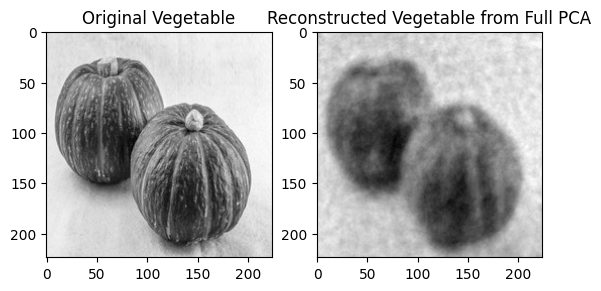

In [ ]:
def reconstructVeggie(pca, of):
    loRep = pca.transform(of)
    recImg = pca.inverse_transform(loRep)
    return loRep, recImg

# Define the index of the vegetable to reconstruct
ndxToReconstruct = 5

# Retrieve features for the vegetable to reconstruct
featuresNdx = image_data[ndxToReconstruct]

# Reshape features for a single sample
featuresNdx_reshaped = np.array(featuresNdx).reshape(1, -1)

# Reconstruct the vegetable
loRep, reconstructed = reconstructVeggie(pca, featuresNdx_reshaped)

# Plot original and reconstructed vegetables
plt.subplot(1, 2, 1)
plt.imshow(featuresNdx.reshape((224, 224)), cmap=plt.cm.gray)
plt.title('Original Vegetable')
plt.grid(False)

plt.subplot(1, 2, 2)
plt.imshow(reconstructed.reshape((224, 224)), cmap=plt.cm.gray)
plt.title('Reconstructed Vegetable from Full PCA')
plt.grid(False)

plt.show()

The above reconstructed image shows that the dimenionality reduction clearly gets rid of a lot of the detail in the picture but still allows for the retention of some of the important features. Namely, the general shape of the vegetables along with their outlines, used to tell them apart, and some of the surface texture and patterns along with the stems of the vegetables.

#Random PCA Dimensionality Reduction

Extracting the top 500 eigenvegetables from 4000 vegetables
CPU times: user 2min 33s, sys: 9.08 s, total: 2min 42s
Wall time: 1min 37s


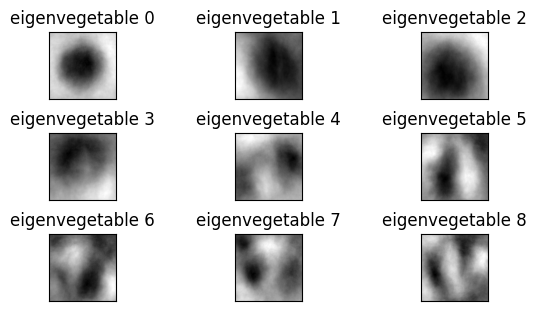

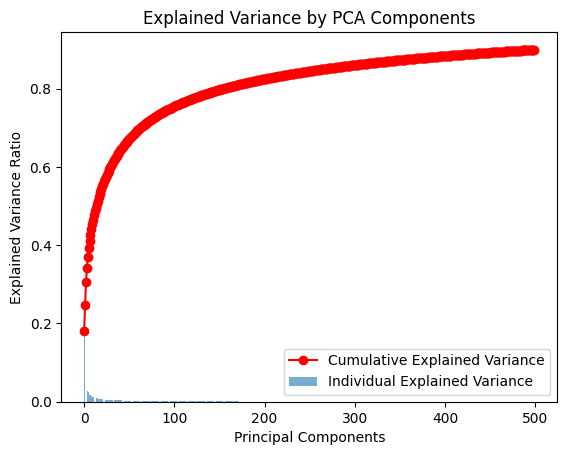

In [ ]:
from sklearn.decomposition import PCA

# Function to plot explained variance by PCA components
def plot_explained_variance(pca):
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    plt.bar(range(len(explained_var)), explained_var, alpha=0.6, label='Individual Explained Variance')
    plt.plot(range(len(cum_var_exp)), cum_var_exp, label='Cumulative Explained Variance', color='red', marker='o')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance by PCA Components')
    plt.legend(loc='best')
    plt.show()

n_components = 500
print(f'Extracting the top {n_components} eigenvegetables from {len(image_data)} vegetables')

# Perform randomized PCA
rpca = PCA(n_components=n_components, svd_solver='randomized')
%time rpca.fit(image_data)

# Reshape eigenvegetables
rEigenvegetables = rpca.components_.reshape((n_components, 224, 224))

rEigenvegetableTitles = ["eigenvegetable %d" % i for i in range(rEigenvegetables.shape[0])]

# Plot first 9 eigenvegetables
for i in range(9):
    plt.subplot(int(3) + 1, 3, i + 1)
    plt.imshow(rEigenvegetables[i], cmap='gray')
    plt.title(rEigenvegetableTitles[i])
    plt.xticks(())
    plt.yticks(())
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

# Plot explained variance
plot_explained_variance(rpca)


The results are extremely similar to the non-random PCA in the preceding step. For this reason we also went forward with using 500 of the best eigen"vegetables" and in the following code the image reconstruction has a nearly identical result, at least as far as we can tell by looking. This is promising and we think that our algorithms could use these applications of PCA but will soon compare these quantitatively to see their differences.

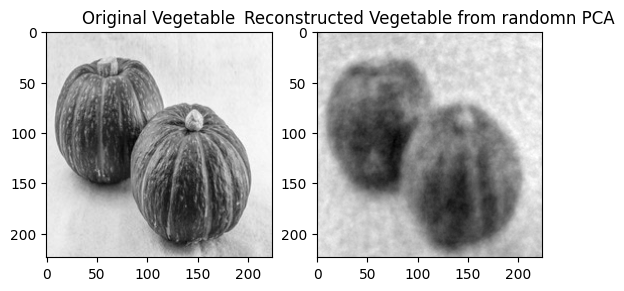

In [ ]:
def reconstructVeggie(pca, of):
    loRep = rpca.transform(of)
    recImg = rpca.inverse_transform(loRep)
    return loRep, recImg

# Define the index of the vegetable to reconstruct
ndxToReconstruct = 5

# Retrieve features for the vegetable to reconstruct
featuresNdx = image_data[ndxToReconstruct]

# Reshape features for a single sample
featuresNdx_reshaped = np.array(featuresNdx).reshape(1, -1)

# Reconstruct the vegetable
loRep, reconstructed = reconstructVeggie(rpca, featuresNdx_reshaped)

# Plot original and reconstructed vegetables
plt.subplot(1, 2, 1)
plt.imshow(featuresNdx.reshape((224, 224)), cmap=plt.cm.gray)
plt.title('Original Vegetable')
plt.grid(False)

plt.subplot(1, 2, 2)
plt.imshow(reconstructed.reshape((224, 224)), cmap=plt.cm.gray)
plt.title('Reconstructed Vegetable from randomn PCA')
plt.grid(False)

plt.show()

#Comparing Dimenionality Reduction Methods (PCA & rPCA)

The below code was implemented to split the image_data into a test/training split and see the accuracy of the two methods in image identification.

By using the sklearn train_test_split import and the accuracy_score import this was relatively easy and results in two very similar accuracy scores which on average hover around the 90% mark.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = image_data
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=32)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train_pca, y_train)

# Evaluate classifier
y_pred = svm_classifier.predict(X_test_pca)
pca_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of SVM with PCA:", pca_accuracy)



# calculating the accuracy of RPCA
X_train_rpca = rpca.fit_transform(X_train)
X_test_rpca = rpca.transform(X_test)

# Train SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train_rpca, y_train)

# Evaluate classifier
y_pred = svm_classifier.predict(X_test_rpca)
rpca_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of SVM with RPCA:", rpca_accuracy)



Accuracy of SVM with PCA: 0.9125
Accuracy of SVM with RPCA: 0.9125


Further exploration of the PCA results continues below through the investigation of their mean squared errors.

In [ ]:
from sklearn.metrics import mean_squared_error

def reconstruct_image(trans_obj,org_features):
    low_rep = trans_obj.transform(org_features)
    rec_image = trans_obj.inverse_transform(low_rep)
    return low_rep, rec_image

def calculate_MSE_array(image_data, labels, pca, mseList):
    print('Calculating MSE for data list')
    for i, image in enumerate(image_data):
        if i >= len(labels):  # Ensure we don't exceed label indices
            break
        low_dimensional_representation, reconstructed_image = reconstruct_image(pca, image.reshape(1, -1))
        mse = mean_squared_error(image.flatten(), reconstructed_image.flatten())
        mseList.append(mse)  # Append MSE along with the corresponding label
    print('MSE values calculations finished')


pca_vegetable_mse = []
%time calculate_MSE_array(image_data[:1000], labels[:1000], pca, pca_vegetable_mse)

rpca_vegetable_mse = []
%time calculate_MSE_array(image_data[:1000], labels[:1000], rpca, rpca_vegetable_mse)


Calculating MSE for data list
MSE values calculations finished
CPU times: user 5min 20s, sys: 4min 50s, total: 10min 10s
Wall time: 6min 46s
Calculating MSE for data list
MSE values calculations finished
CPU times: user 5min 38s, sys: 4min 52s, total: 10min 30s
Wall time: 6min 59s


The next two visualizations are of the MSE differences for the entire data and show that there are very few differences between PCA and random PCA for this part of the application.

Due to this we go ahead and do MSE calculation based on the associated labels to see if that results in anything different or significant.

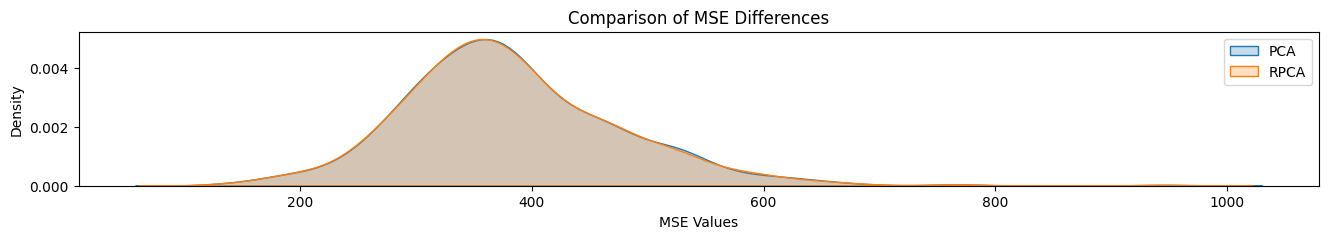

In [ ]:
import warnings
import seaborn as sns
warnings.filterwarnings("ignore", category=FutureWarning)

plt.figure(figsize=(16, 2))

sns.kdeplot(pca_vegetable_mse, label='PCA', fill=True)
sns.kdeplot(rpca_vegetable_mse, label='RPCA', fill=True)

plt.xlabel('MSE Values')
plt.ylabel('Density')
plt.title('Comparison of MSE Differences')
plt.legend()

plt.show()

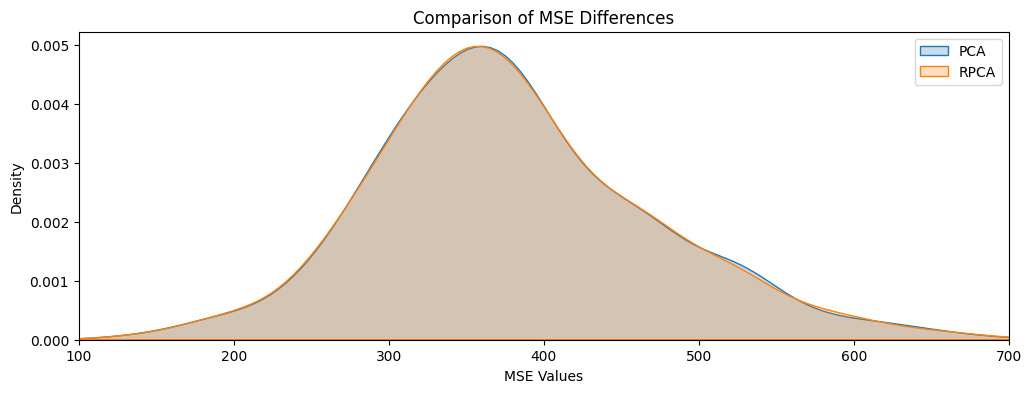

In [ ]:
plt.figure(figsize=(12, 4))
plt.xlim(100, 700)

sns.kdeplot(pca_vegetable_mse, label='PCA', fill=True)
sns.kdeplot(rpca_vegetable_mse, label='RPCA', fill=True)

plt.xlabel('MSE Values')
plt.ylabel('Density')
plt.title('Comparison of MSE Differences')
plt.legend()

plt.show()

In [ ]:
def calculate_MSE_array_per_label(image_data, labels, pca, mseList, num_images_per_label):
    print('Calculating MSE for each unique label')
    unique_labels = np.unique(labels)
    for label in unique_labels:
        label_indices = [i for i, l in enumerate(labels) if l == label]  # Get indices of images with current label
        label_indices = label_indices[:num_images_per_label]
        for idx in label_indices:
            low_dimensional_representation, reconstructed_image = reconstruct_image(pca, image_data[idx].reshape(1, -1))
            mse = mean_squared_error(image_data[idx].flatten(), reconstructed_image.flatten())
            mseList.append((mse))  # Append MSE along with the corresponding label
    print('MSE values calculations finished')


pca_vegetable_mse_label = []
%time calculate_MSE_array_per_label(image_data, labels, pca, pca_vegetable_mse_label, num_images_per_label=100)

rpca_vegetable_mse_label = []
%time calculate_MSE_array_per_label(image_data, labels, rpca, rpca_vegetable_mse_label, num_images_per_label=100)


Calculating MSE for each unique label
MSE values calculations finished
CPU times: user 2min 7s, sys: 1min 56s, total: 4min 4s
Wall time: 2min 40s
Calculating MSE for each unique label
MSE values calculations finished
CPU times: user 2min 14s, sys: 1min 56s, total: 4min 11s
Wall time: 2min 46s


The below visualizations show that the MSE calculated in respect to the label data also has little differences between PCA and random PCA.

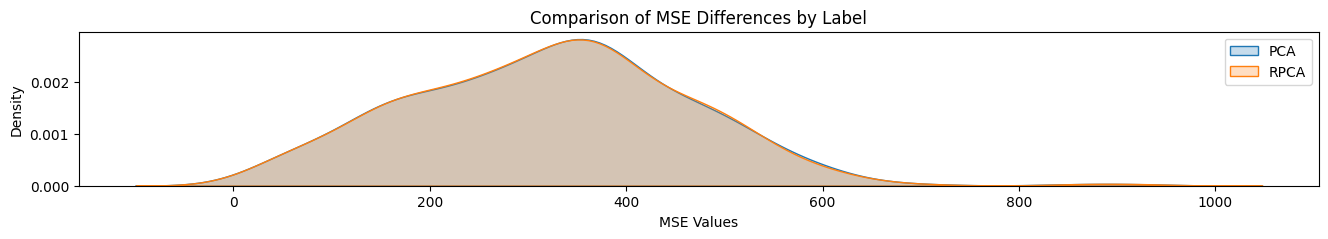

In [ ]:
import warnings
import seaborn as sns
warnings.filterwarnings("ignore", category=FutureWarning)

plt.figure(figsize=(16, 2))

sns.kdeplot(pca_vegetable_mse_label, label='PCA', fill=True)
sns.kdeplot(rpca_vegetable_mse_label, label='RPCA', fill=True)

plt.xlabel('MSE Values')
plt.ylabel('Density')
plt.title('Comparison of MSE Differences by Label')
plt.legend()

plt.show()

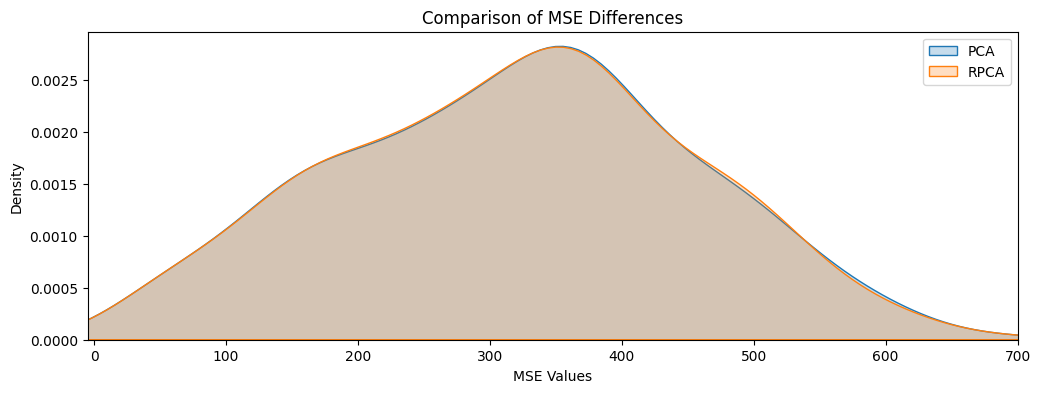

In [ ]:
plt.figure(figsize=(12, 4))
plt.xlim(-5, 700)

sns.kdeplot(pca_vegetable_mse_label, label='PCA', fill=True)
sns.kdeplot(rpca_vegetable_mse_label, label='RPCA', fill=True)

plt.xlabel('MSE Values')
plt.ylabel('Density')
plt.title('Comparison of MSE Differences')
plt.legend()

plt.show()

We then found the differences between PCA and random PCA among the averaged MSE and the MSE found based on specific target labels and produced the following visualization. It shows that there is little difference between the ways we contrived to find the MSE and also shows that there is little difference in the actual use of PCA and random PCA across the two methods.

To reiterate on previous points and expand on new findings, in each of the graphs there is little to no difference between PCA and random PCA. Not only did we find this but we now also understand that there is little difference between the aggredated MSE and the MSE that was found by basing the calculation on unique target labels. While we hoped we would find a meaningful differences here it only further strengthened the idea that the two methodologies were similar and that the variance based on the feature was negligible in effecting the proces.

Due to these findings, we have concluded that both PCA and random PCA are viable methods to reconstruct the images in respect to dimensionality reduction. We feel that this is further supported by the close accuracy ratings of the two methods as well as the fact that they have similar runtimes around a two and a half minute CPU time. These last two facts being what really confirms our feeling that the two methods are functionally similar in terms of our usage and application of them here. If, for our dataset and application, they take the same amount of time, produce similar results in relation to accuracy, and if they have nearly identical MSE then we seen no need in excluding one beyond preference.

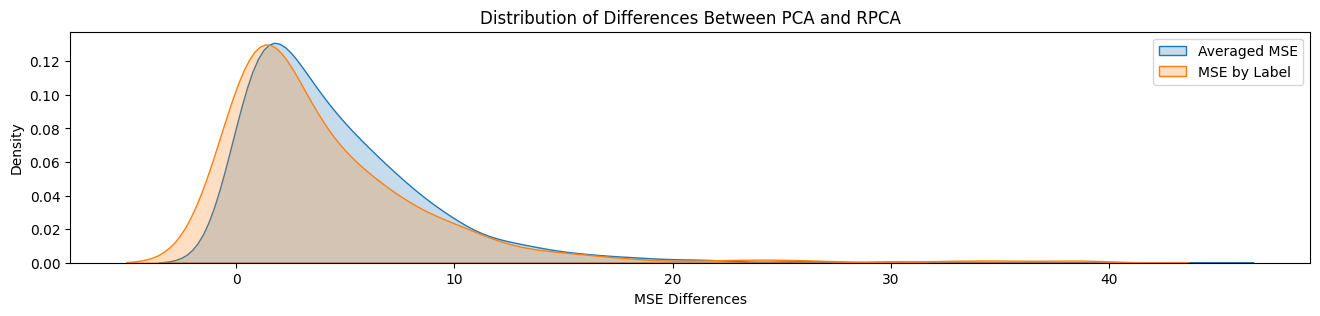

In [ ]:
plt.figure(figsize=(16, 3))

difference_MSE = [abs(x - y) for x, y in zip(pca_vegetable_mse, rpca_vegetable_mse)]
difference_MSE_label = [abs(x - y) for x, y in zip(pca_vegetable_mse_label, rpca_vegetable_mse_label)]

sns.kdeplot(difference_MSE, fill=True, label='Averaged MSE')
sns.kdeplot(difference_MSE_label, fill=True, label='MSE by Label')

plt.xlabel('MSE Differences')
plt.ylabel('Density')
plt.title('Distribution of Differences Between PCA and RPCA')
plt.legend()

plt.show()

#Feature Extraction

We begin the feature extraction portion of the lab by utilizing the sobel filter before immediately going into the DAISY method.

In the following code blocks you can see the sobel application along with the DAISY application and all of the related pre-processing.

<ipython-input-54-0a104b91f26e>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ndx = int(np.random.rand(1) * len(image_data))


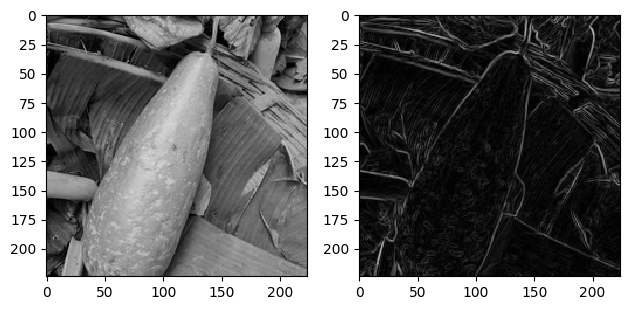

In [ ]:
from skimage.io import imshow
from skimage.filters import sobel_h, sobel_v

plt.subplot(1, 2, 1)
ndx = int(np.random.rand(1) * len(image_data))
img = image_data[ndx].reshape((224, 224))
imshow(img, cmap='gray')
plt.grid(False)

plt.subplot(1, 2, 2)
gradient_mag = np.sqrt(sobel_v(img)**2 + sobel_h(img)**2)
imshow(gradient_mag, cmap='gray')
plt.grid(False)

plt.show()


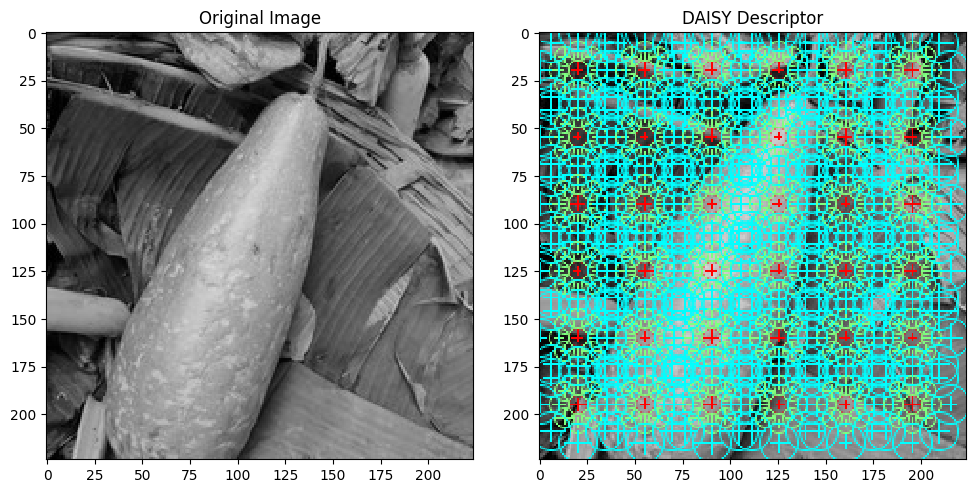

(6, 6, 68)
2448
CPU times: user 114 ms, sys: 164 µs, total: 115 ms
Wall time: 129 ms


(24548,)

In [ ]:
from skimage.feature import daisy

# Create a subplot with 1 row and 2 columns
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 2, 1)
img = img.reshape(224, 224)
imshow(img, cmap='gray')
plt.title('Original Image')
plt.grid(False)

# Apply DAISY and visualize the descriptor
plt.subplot(1, 2, 2)
extractedFeatures, imgDesc = daisy(img, step=35, radius=20, rings=2, histograms=8, orientations=4, visualize=True)
imshow(imgDesc)
plt.title('DAISY Descriptor')
plt.grid(False)

plt.show()

print(extractedFeatures.shape)
print(extractedFeatures.shape[0] * extractedFeatures.shape[1] * extractedFeatures.shape[2])

def applyDaisy(r, s):
    feat = daisy(r.reshape(s), step=10, radius=20, rings=2, histograms=8, orientations=4, visualize=False)
    return feat.reshape((-1))

%time testFeature = applyDaisy(image_data[3], (224, 224))
testFeature.shape

In [ ]:
# more preprocessing
from sklearn.metrics.pairwise import pairwise_distances

print(f'Estimated runtime: {0.026 * len(image_data)}') # approximate runtime

daisyFeatures = []
for img in image_data:
    daisyFeature = applyDaisy(img, (224, 224))
    daisyFeatures.append(daisyFeature)
daisyFeatures = np.array(daisyFeatures)
print(daisyFeatures.shape)

%time distMtrx = pairwise_distances(daisyFeatures)

Estimated runtime: 104.0
(4000, 24548)
CPU times: user 24.7 s, sys: 960 ms, total: 25.7 s
Wall time: 16.9 s


The following code block is used to randomly choose a image from the image data list and find the closest match using the DAISY processing we did before. It also includes a small if/else print function to show that the images aren't the same as while they might appear the same in some cases this is only because some of the images are very similar.

<ipython-input-58-b76542ee4fdf>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ndx1 = int(np.random.rand(1) * len(image_data))


False


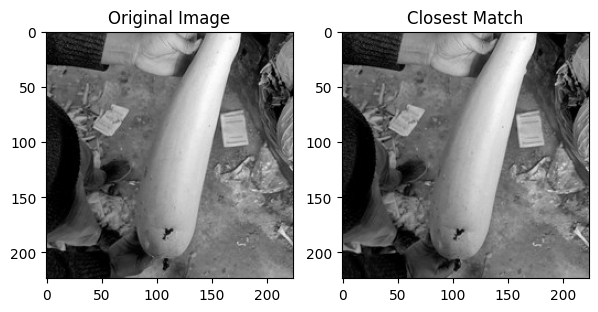

In [ ]:
import copy

# Find closest image to a randomly chosen image
ndx1 = int(np.random.rand(1) * len(image_data))

# Calculate distances to other images
dists = copy.deepcopy(distMtrx[ndx1, :])
dists[ndx1] = np.infty

# Find index of the image with the smallest distance
ndx2 = np.argmin(dists)

# Plot the original image and its closest match
plt.figure(figsize=(7, 10))

plt.subplot(1, 2, 1)
plt.imshow(image_data[ndx1].reshape((224, 224)), cmap='gray')
plt.title("Original Image")
plt.grid(False)

plt.subplot(1, 2, 2)
plt.imshow(image_data[ndx2].reshape((224, 224)), cmap='gray')
plt.title("Closest Match")
plt.grid(False)

if np.array_equal(image_data[ndx1], image_data[ndx2]):
    print("True")
else:
    print("False")

plt.show()


The following code block is implemented to find the accuracy of the DAISY method by checking to see if the label of the closest image that we can find is the same as the label of the original image. The accuracy is 85% which is a little less than what PCA was capable of. However, this is still a strong accuracy and we believe that if the images were to retain more of their data, namely RGB values removed for computational limitations, the percentage would be much higher. Especially among vegetables that have very different colorings.

Regarding the use of this method in our program it has a very strong argument as while it does have a little bit of a computational overhead regarding the CPU time it used to process the images the resulting data histograms are then able to work quickly and accurately on the fly. Not to mention the fact that we could likely spend more time analyzing this processing and researching ways to augment it with its inputs to get better results. An option that is lacking from the PCA and random PCA alternatives. Because of this we would say that this method is not only a strong contender in comparison but also when considering the possibilities it has when more effort is put into understanding the process and its limits.

In [ ]:
correct_matches = 0
total_matches = 0

for i in range(len(image_data)):
    ndx1 = i
    dists = copy.deepcopy(distMtrx[ndx1, :])
    dists[ndx1] = np.infty
    ndx2 = np.argmin(dists)

    # Check if the label of the closest match matches the label of the original image
    if labels[ndx1] == labels[ndx2]:
        correct_matches += 1

    total_matches += 1

accuracy = correct_matches / total_matches
print("Accuracy:", accuracy)


Accuracy: 0.85375


#Utilization of Heatmaps to Explore Feature Relations

CPU times: user 653 ms, sys: 158 ms, total: 812 ms
Wall time: 435 ms
CPU times: user 660 ms, sys: 172 ms, total: 832 ms
Wall time: 475 ms
CPU times: user 21.8 s, sys: 994 ms, total: 22.8 s
Wall time: 13.1 s


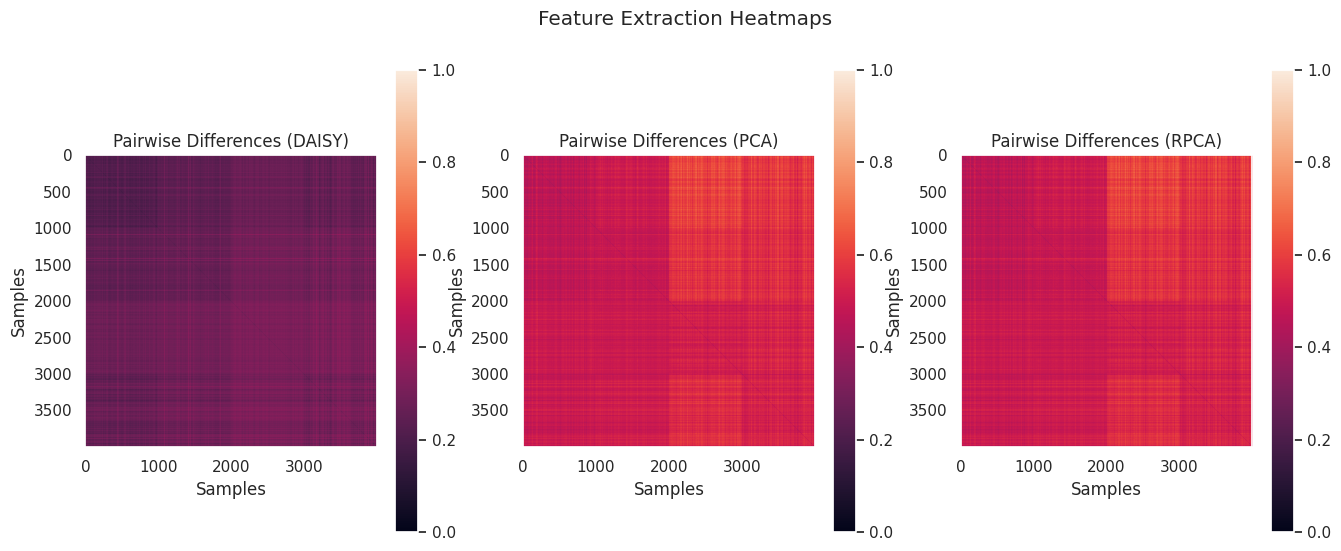

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import MinMaxScaler

principal_components = pca.fit_transform(image_data)
principal_components_r = rpca.fit_transform(image_data)
scaler = MinMaxScaler(feature_range=(0, 1))

%time pairwise_differences_m_pca_list = pairwise_distances(principal_components)

pairwise_differences_m_pca = np.array(pairwise_differences_m_pca_list)
pairwise_differences_m_pca = scaler.fit_transform(pairwise_differences_m_pca)

%time pairwise_differences_m_rpca_list = pairwise_distances(principal_components_r)

pairwise_differences_m_rpca = np.array(pairwise_differences_m_rpca_list)
pairwise_differences_m_rpca = scaler.fit_transform(pairwise_differences_m_rpca)

%time pairwise_differences_m = pairwise_distances(daisyFeatures)
pairwise_differences_m = scaler.fit_transform(pairwise_differences_m)

cmap = sns.set(style="darkgrid")

plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.imshow(pairwise_differences_m, cmap=cmap)#, vmin=vmin, vmax=vmax)
plt.colorbar()
plt.grid(False)

plt.xlabel('Samples')
plt.ylabel('Samples')
plt.title('Pairwise Differences (DAISY)')

plt.subplot(1, 3, 2)
plt.imshow(pairwise_differences_m_pca, cmap=cmap)#, vmin=vmin, vmax=vmax)
plt.colorbar()
plt.grid(False)

plt.xlabel('Samples')
plt.ylabel('Samples')
plt.title('Pairwise Differences (PCA)')

plt.subplot(1, 3, 3)
plt.imshow(pairwise_differences_m_rpca, cmap=cmap)#, vmin=vmin, vmax=vmax)
plt.colorbar()
plt.grid(False)

plt.xlabel('Samples')
plt.ylabel('Samples')
plt.title('Pairwise Differences (RPCA)')

plt.suptitle('Feature Extraction Heatmaps')
plt.show()

The heatmaps above show that the DAISY method shows very little relation across the entirety of the features with the entire square being a darker purple. This example also benefits from the fact that of the 4000 images they are divided equally among the 4 targets so we can help look at the 16 sub sections of the graph.

In this way we can see that the PCA and random PCA are extremely similar, which would be expected based on our previous findings, and that they have similar relativity throughout the heatmap with a slighty stronger relation on the right side of the heatmap.

The code below is our re-vizualization of the heatmaps in relation to the separate labels so that we can better understand the performance of the methods.

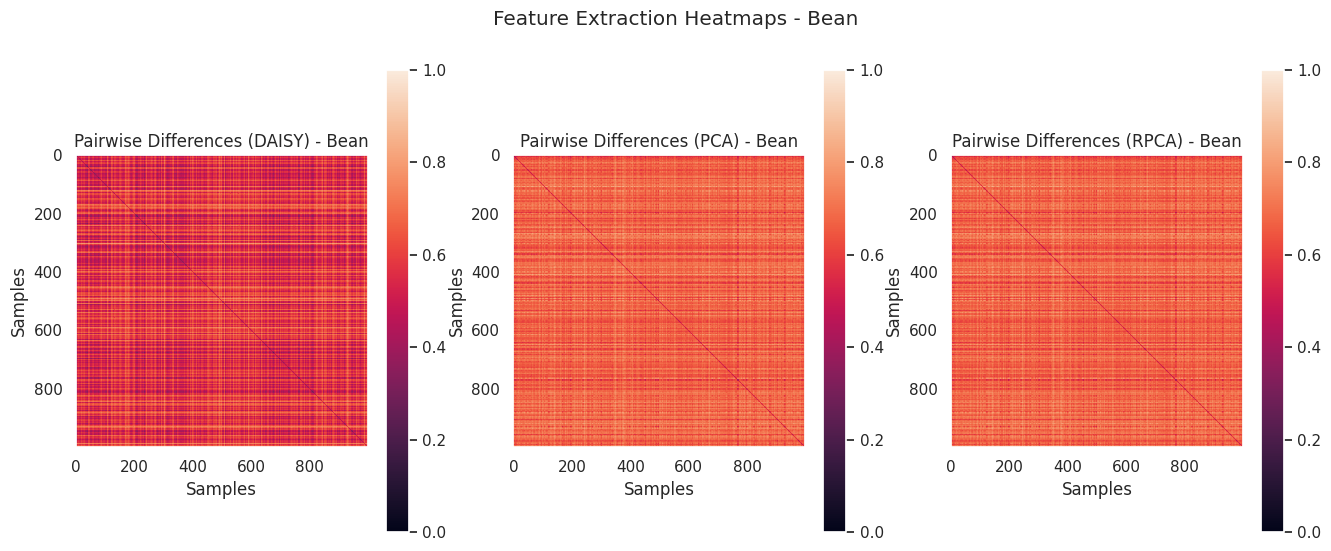

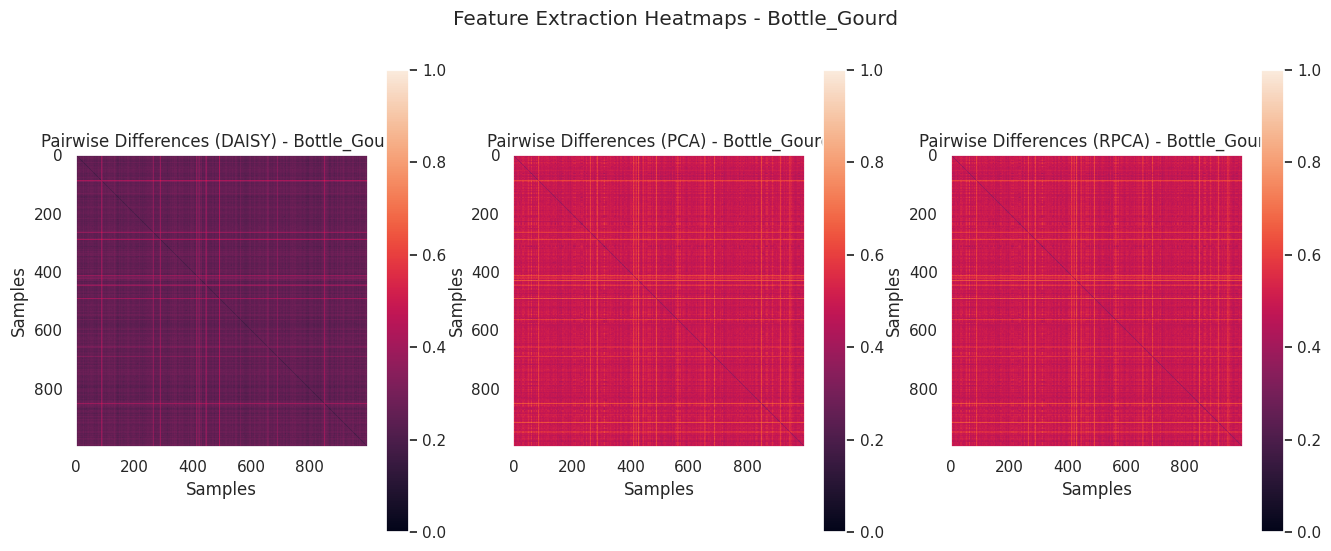

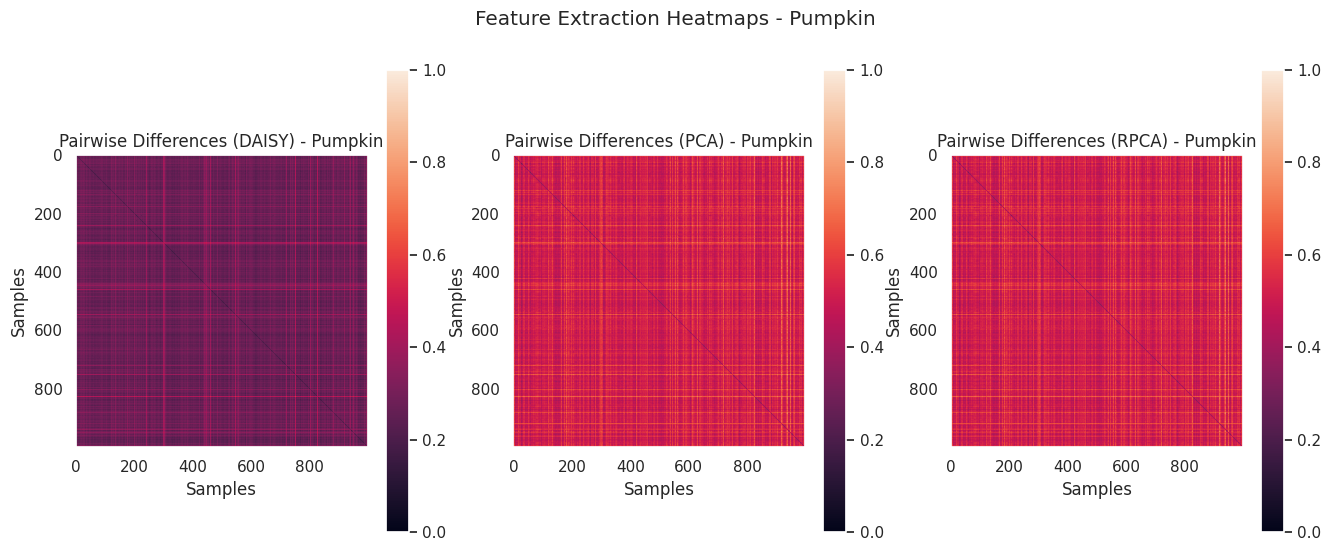

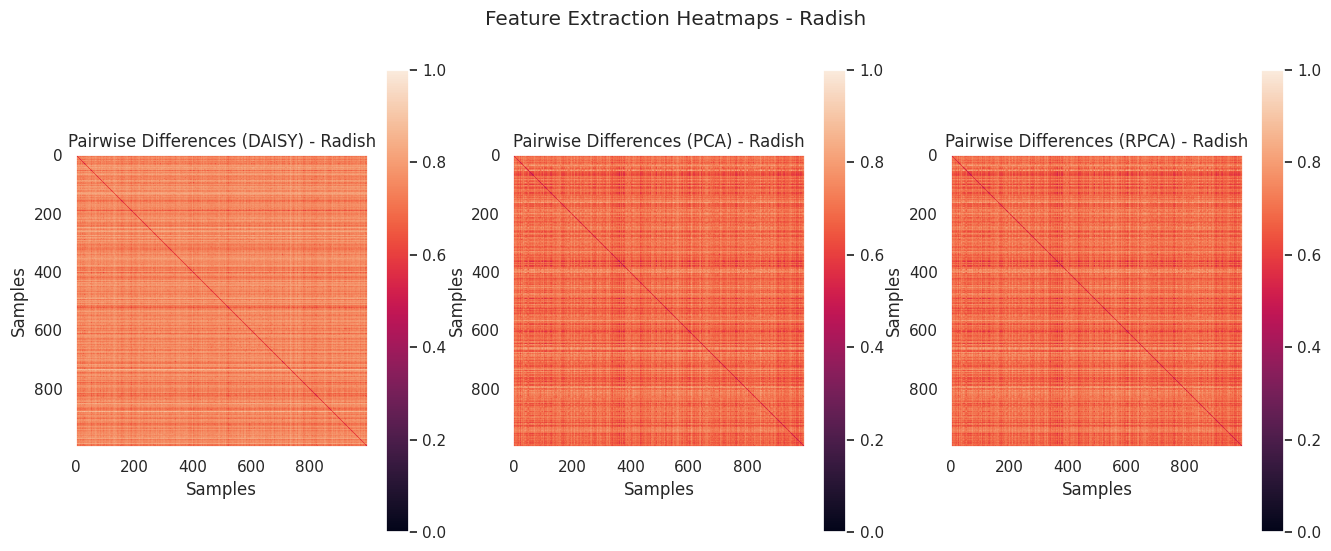

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

# Group the data by vegetable type
unique_labels = np.unique(labels)

for label in unique_labels:
    # Filter the data for the current vegetable type
    filtered_data = [image_data[i] for i, l in enumerate(labels) if l == label]

    # Convert filtered data to numpy array if necessary
    label_data = np.array(filtered_data)

    # Perform PCA and Randomized PCA
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(label_data)

    rpca = PCA(n_components=n_components, svd_solver='randomized')
    principal_components_r = rpca.fit_transform(label_data)

    # Perform DAISY feature extraction
    daisyFeatures = np.apply_along_axis(applyDaisy, 1, label_data, (224, 224))

    # Scale the pairwise differences
    scaler = MinMaxScaler(feature_range=(0, 1))

    pairwise_differences_m_pca_list = pairwise_distances(principal_components)
    pairwise_differences_m_pca = scaler.fit_transform(pairwise_differences_m_pca_list)

    pairwise_differences_m_rpca_list = pairwise_distances(principal_components_r)
    pairwise_differences_m_rpca = scaler.fit_transform(pairwise_differences_m_rpca_list)

    pairwise_differences_m = pairwise_distances(daisyFeatures)
    pairwise_differences_m = scaler.fit_transform(pairwise_differences_m)

    # Plot the heatmaps
    cmap = sns.set(style="darkgrid")

    plt.figure(figsize=(16, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(pairwise_differences_m, cmap=cmap)
    plt.colorbar()
    plt.grid(False)
    plt.xlabel('Samples')
    plt.ylabel('Samples')
    plt.title(f'Pairwise Differences (DAISY) - {label}')

    plt.subplot(1, 3, 2)
    plt.imshow(pairwise_differences_m_pca, cmap=cmap)
    plt.colorbar()
    plt.grid(False)
    plt.xlabel('Samples')
    plt.ylabel('Samples')
    plt.title(f'Pairwise Differences (PCA) - {label}')

    plt.subplot(1, 3, 3)
    plt.imshow(pairwise_differences_m_rpca, cmap=cmap)
    plt.colorbar()
    plt.grid(False)
    plt.xlabel('Samples')
    plt.ylabel('Samples')
    plt.title(f'Pairwise Differences (RPCA) - {label}')

    plt.suptitle(f'Feature Extraction Heatmaps - {label}')
    plt.show()


The above heatmaps show that Pumpkins and Bottle gourds have very similar heatmaps and that Radishes and Beans have similar heatmaps.

The Pumpkins and Bottle Gourds have a similar heat map to the aggregated heatmap previously vizualized. Namely, the DAISY method has low relation and the PCA relations are better but still very uniform. Some of the stark lines seen throughout these heatmaps are probably related to some of the previously mentioned very similar pictures.

In contras the Radishes and the Beans which have similar heatmaps have better relations throughout all of them with the Radish DAISY heatmap having some of the strongest results across all of the heatmaps. While we can posit that this is because of the unique shapes of these vegetables in comparison to the others in the set we arent sure but understand that the image recognition around these vegetables will probably tend to be much stronger than those of their counterparts.

#4. Exceptional Work

In [ ]:
from skimage.feature import match_descriptors
X = image_data
y = labels
h, w = 224, 224

def apply_daisy(row,shape): # no reshape in this function
    feat = daisy(row.reshape(shape), step=5, radius=5,
                 rings=2, histograms=8, orientations=4,
                 visualize=False)
    s = feat.shape # PxQxR
    #P = ceil((Height - radius*2) / step)
    #Q = ceil((Width - radius*2) / step)
    #R = (rings * histograms + 1) * orientations
    return feat.reshape((s[0]*s[1],s[2]))

d1 = apply_daisy(X[10],(h,w))
d2 = apply_daisy(X[11],(h,w))
d3 = apply_daisy(X[0],(h,w))

print(d1.shape, d2.shape, d3.shape)
print('Classes:',y[10],y[11],y[0])


# return list of the key points indices that matched closely enough
matches = match_descriptors(d1, d2, cross_check=True, max_ratio=0.8)
print(f"Number of matches, same class: {matches.shape[0]}, Percentage:{100*matches.shape[0]/len(d1):0.2f}%")


(50176,)
(1849, 68) (1849, 68) (1849, 68)
Classes: Pumpkin Pumpkin Pumpkin
Number of matches, same class: 29, Percentage:1.57%


In [ ]:
from skimage.feature import match_descriptors

def guess_image_label(image_index, image_data, labels):
    # Compute DAISY features for the first image
    d1 = apply_daisy(image_data[image_index], (h, w))

    # Dictionary to store the number of matches for each label
    label_matches = {}

    # Iterate through all images in image_data
    for i, img in enumerate(image_data):
        # Compute DAISY features for the current image
        d2 = apply_daisy(img, (h, w))

        # Compute matches between the DAISY features of the first image and the current image
        matches = match_descriptors(d1, d2, cross_check=True, max_ratio=0.8)

        # Update label_matches with the label of the current image and the number of matches
        label = labels[i]
        if label not in label_matches:
            label_matches[label] = len(matches)
        else:
            label_matches[label] += len(matches)

    # Guess the label with the highest number of matches
    guessed_label = max(label_matches, key=label_matches.get)
    return guessed_label




In [68]:
import random
x = 5  # Replace 10 with the desired number of iterations

for _ in range(x):
    # Generate a random index between 0 and the length of image_data list
    random_index = random.randint(0, len(image_data) - 1)

    # Perform further operations using random_index if needed
    print("image #: ", random_index)
    print("Target label:", labels[random_index])
    guessed_label = guess_image_label(random_index, image_data, labels)
    print("Guessed label:", guessed_label)

image #:  135
Target label: Pumpkin
Guessed label: Pumpkin
image #:  3551
Target label: Bean
Guessed label: Bean
image #:  2866
Target label: Radish
Guessed label: Radish
image #:  3561
Target label: Bean
Guessed label: Bean
image #:  1110
Target label: Bottle_Gourd
Guessed label: Bottle_Gourd


#Analysis

Utilizing key point matching with DAISY resulted in the above results. Unfortunately the code that we implemented along with the structure of our data meant that the CPU time of one of these brute force comparisons was around 15 minutes. Due to this computational limitation, we were only able to reasonably run five instances of this for testing. While the five instances all resulted in correct label identification the extreme CPU time that this took renders the method unusable for our application.

While we understand that we may have incorrectly and negatively affected the time complexity of the function and made it so that we cannot accurately compare the accuracy with such a small sample we can still reasonably compare the potential accuracy and proposed runtimes of this methodology in comparison to the DAISY application with histogram comparisons.

Again, this boils down to even if we assumed the best, that this has a much higher accuracy, and if we greatly overestimate potential CPU times, then we can compare the potential differences in the two DAISY applications. We believe that while the key point method may have better accuracy we wouldn't forego the speed of the original method especially considering our previous deduction that further exploration into the DAISY parameters could result in better accuracy while only impacted the initial overhead of histogram production.

In conclusion, the PCA dimensionality reduction had very strong results with both PCA and random PCA being very similar. However, in comparison, the Daisy methodology, in allowing for more user customization, seems to be the more promising method. Especially considering the speed of the application and the similar results despite a lack of in-depth research regarding the DAISY applications.

#References
Related links used for reference of imports and functions:

https://pillow.readthedocs.io/en/stable/reference/Image.html

https://pypi.org/project/opendatasets/

https://seaborn.pydata.org/generated/seaborn.kdeplot.

https://scikit-image.org/docs/stable/api/skimage.feature.html

https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_daisy.html